
## **Data médica - Enfermedades coronarias**

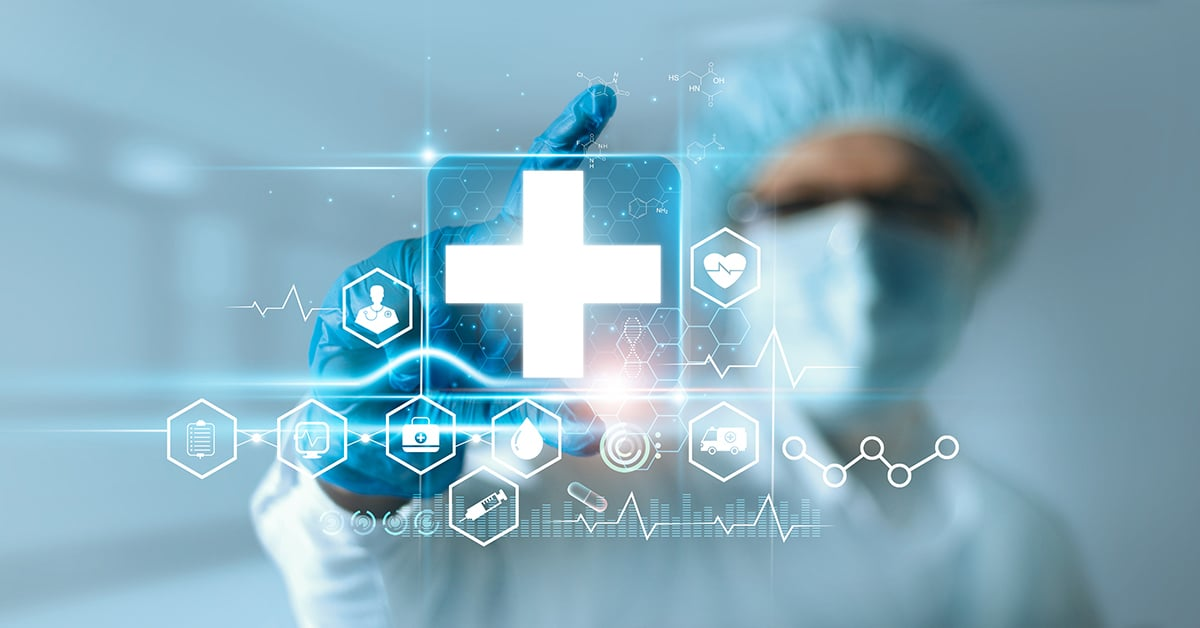

**Integrantes:**
- Molina Rodriguez, Juan 20200328

Este conjunto de datos agrupa información clínica y sociodemográfica de una muestra poblacional, con el objetivo de identificar los factores de riesgo que predicen la aparición de enfermedades coronarias en un horizonte temporal de diez años. Cada observación corresponde a un individuo y detalla variables como género, edad, nivel educativo, hábitos de vida, tratamientos farmacológicos, estado de salud general y medidas antropométricas.

- **Género(male):** Indica el género de la persona.
  - **Male:** Hombre
  - **Female:** Mujer
- **Edad (age):** La edad de la persona en años.
- **Educación (Education):** Nivel educativo de la persona. Las categorías parecen ser codificadas como:
  - **C:** Primaria completa
  - **HS:** Secundaria completa
  - **SHS:** Universidad incompleta
  - **SC:** Universidad completa
- **Fumador Actual (currentSmoker):** Estado de fumar actual.
  - **Yes:** Sí
  - **No:** No
- **Cigarrillos por Día (cigsPerDay):** Número promedio de cigarrillos fumados por día.
- **Medicamentos para la Presión Arterial (BPMeds):** Uso de medicamentos para controlar la presión arterial.
  - **1:** Sí
  - **0:** No
- **Accidente Cerebrovascular Prevalente (prevalentStroke):** Historial de accidentes cerebrovasculares.
  - **1:** Sí
  - **0:** No
- **Hipertensión Prevalente (prevalentHyp):** Presencia de hipertensión.
  - **1:** Sí
  - **0:** No
- **Diabetes (diabetes):** Presencia de diabetes.
  - **1:** Sí
  - **0:** No
- **Colesterol Total (totChol):** Nivel total de colesterol en la sangre.
- **Presión Arterial Sistólica (sysBP):** Presión arterial sistólica (el número más alto en una lectura de presión arterial).
- **Presión Arterial Diastólica (diaBP):** Presión arterial diastólica (el número más bajo en una lectura de presión arterial).
- **Índice de Masa Corporal (BMI):** Índice de masa corporal calculado.
- **Frecuencia Cardíaca (heartRate):** Frecuencia cardíaca en reposo.
- **Glucosa (glucose):** Nivel de glucosa en sangre.
- **Enfermedad Coronaria a Diez Años (TenYearCHD):** Evaluación del riesgo de desarrollar una enfermedad coronaria dentro de los próximos diez años.
  - **Disease:** Riesgo presente
  - **NonDisease:** Sin riesgo

## **INSTALACIÓN DE PAQUETES**

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
!pip install scikeras

## **IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import seaborn as sns

from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score,auc
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA # Import PCA
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**SEMILLA ALEATORIA**

In [ ]:
# fix random seed for reproducibility
seed = 100
tf.random.set_seed(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **LECTURA DE DATOS**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Data.txt", delimiter="\t")
# Muestra el DataFrame para verificar si se leyó correctamente
df = df.dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,C,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,NonDisease
1,Female,46,HS,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,NonDisease
2,Male,48,SHS,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,NonDisease
3,Female,61,SC,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Disease
4,Female,46,SC,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,NonDisease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,SHS,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,Disease
4234,Male,51,SC,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,NonDisease
4237,Female,52,HS,No,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,NonDisease
4238,Male,40,SC,No,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,NonDisease


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   object 
 1   age              3658 non-null   int64  
 2   education        3658 non-null   object 
 3   currentSmoker    3658 non-null   object 
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 485.8+ KB


In [ ]:
columnas_binarias = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
df[columnas_binarias] = df[columnas_binarias].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             3658 non-null   object  
 1   age              3658 non-null   int64   
 2   education        3658 non-null   object  
 3   currentSmoker    3658 non-null   object  
 4   cigsPerDay       3658 non-null   float64 
 5   BPMeds           3658 non-null   category
 6   prevalentStroke  3658 non-null   category
 7   prevalentHyp     3658 non-null   category
 8   diabetes         3658 non-null   category
 9   totChol          3658 non-null   float64 
 10  sysBP            3658 non-null   float64 
 11  diaBP            3658 non-null   float64 
 12  BMI              3658 non-null   float64 
 13  heartRate        3658 non-null   float64 
 14  glucose          3658 non-null   float64 
 15  TenYearCHD       3658 non-null   object  
dtypes: category(4), float64(7), int64(1), object(4)

In [ ]:
# Install seaborn if it is not already installed
!pip install seaborn

# Import the seaborn library and give it the alias 'sns'
import seaborn as sns

<ipython-input-15-07a72abc6694>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['TenYearCHD'], palette='Set2')


<Axes: xlabel='TenYearCHD', ylabel='count'>

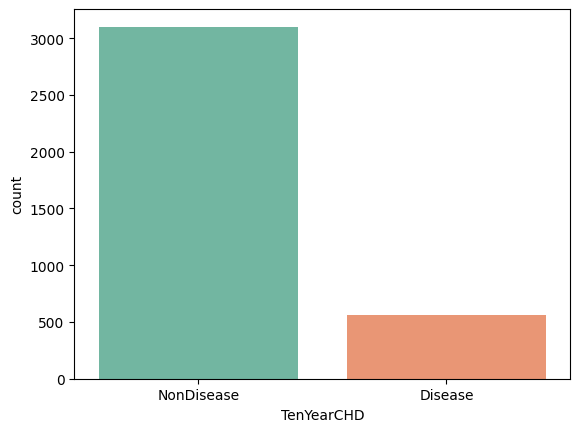

In [ ]:
#Univariate analysis target.
sns.countplot(x = df['TenYearCHD'], palette='Set2')

INTERPRETACIÓN: La mayoría de las personas en el conjunto de datos no desarrollaron una enfermedad coronaria en los próximos diez años: La barra correspondiente a "NonDisease" es mucho más alta que la barra de "Disease". Se concluye que la enfermedad coronaria, al menos en este conjunto de datos, es un evento relativamente menos frecuente.

In [ ]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, np.ravel(y),
                                    test_size = 0.70, random_state = 100)

In [ ]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
# columnas cualitativas. Para mantener las columnas a las que no se les aplica
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler()),
                                ('pca', PCA(n_components=7))]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [ ]:
from sklearn import set_config
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('pca', PCA(n_components=7))]),
                                 ['age', 'cigsPerDay', 'totChol', 'sysBP',
                                  'diaBP', 'BMI', 'heartRate', 'glucose']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['male', 'education', 'currentSmoker',
                                  'BPMeds', 'prevalentStroke', 'prevalentHyp',
                                  'diabetes'])])

El ColumnTransformer es una herramienta esencial en el preprocesamiento de datos para machine learning, ya que te permite preparar tus datos de forma eficiente y efectiva para el entrenamiento de modelos.

In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.fit_transform(X_test)
X_test_prep

array([[-0.17806763, -0.9153219 ,  0.97166151, ...,  1.        ,
         0.        ,  1.        ],
       [-2.09183174, -0.18291668, -0.08502878, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.0967669 , -0.24980101,  0.33157209, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-1.88022454, -0.53672941, -0.05546085, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.05705069,  0.21844495, -0.81323024, ...,  0.        ,
         1.        ,  0.        ],
       [-2.3454731 ,  0.09889654, -0.74224729, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
num_columns_after_pca = X_train_prep.shape[1]
num_columns_after_pca

23

El resultado 23 nos indica que después de aplicar el preprocesamiento (que incluyó PCA para reducir la dimensionalidad), el conjunto de datos de entrenamiento X_train_prep tiene 23 columnas.

In [ ]:
# Supongamos que preprocessor es un ColumnTransformer que incluye ACP
X_train_transformed = preprocessor.transform(X_train)  # sin fit

# Verifica la nueva cantidad de columnas
num_columns_after_pca = X_train_transformed.shape[1]

# Actualiza los nombres de las columnas
# Si tienes otros nombres de columnas categóricas, asegúrate de agregarlos también
encoded_cat = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)
pca_columns = [f'pca_{i+1}' for i in range(num_columns_after_pca - len(encoded_cat))]
labels = np.concatenate([pca_columns, encoded_cat])

# Crea el DataFrame con los datos transformados y las etiquetas correctas
X_train_prep = pd.DataFrame(X_train_transformed, columns=labels)
X_test_prep = pd.DataFrame(preprocessor.transform(X_test), columns=labels)

# Ahora debería funcionar sin errores
X_test_prep


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,male_Female,male_Male,education_C,...,currentSmoker_No,currentSmoker_Yes,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,-0.178068,-0.915322,0.971662,0.987475,-0.279175,-0.923504,-0.497350,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-2.091832,-0.182917,-0.085029,0.404954,0.880286,0.047137,-1.014583,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2.096767,-0.249801,0.331572,0.133780,0.335492,1.086400,0.440629,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,2.799199,-0.509162,-2.241285,0.265886,-0.268519,-2.004214,-0.410230,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.794209,-0.620189,0.385502,-0.030210,0.511493,0.540630,0.276998,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,-0.271271,0.338023,0.597841,0.607188,0.916198,0.149985,-1.150713,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2557,-2.901656,-0.064100,-0.418836,-0.329968,0.377762,-0.582143,-0.376205,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2558,-1.880225,-0.536729,-0.055461,0.519832,0.672190,-0.099216,-0.509532,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2559,1.057051,0.218445,-0.813230,0.627662,0.712023,0.846009,1.020279,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
lb = LabelEncoder()
from keras.utils import to_categorical
y_train_prep = to_categorical(lb.fit_transform(y_train))
y_test_prep = to_categorical(lb.fit_transform(y_test))
y_test_prep

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Los datos están ahora en un formato adecuado para ser utilizados como entrada de una red neuronal, ya que muchas redes neuronales esperan que las etiquetas estén en este formato one-hot, Las etiquetas han sido convertidas al formato one-hot encoding (0,1)significa que la muestra pertenece a la segunda clase (siendo la primera clase 0).

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=17, activation='relu', kernel_initializer='uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='uniform'))
model.add(Dense(2, activation='sigmoid'))
seed = 100
tf.random.set_seed(seed)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              32 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 377 (1.47 KB)

 Trainable params: 377 (1.47 KB)

 Non-trainable params: 0 (0.00 B)

Este resumen nos proporciona una visión general de la arquitectura de una red neuronal secuencial, que es un tipo común de red neuronal artificial. Específicamente, nos muestra la estructura de la red, el tamaño de cada capa y el número total de parámetros que necesita entrenar.
- Layer (type): Especifica el tipo de capa.
- Output Shape: Indica la dimensión de la salida de cada capa.
- Param #: Muestra el número de parámetros que la capa necesita entrenar. Los parámetros son los pesos y sesgos que la red ajusta durante el entrenamiento para aprender a realizar la tarea deseada.

In [ ]:
#compiling the sequential model
# La compilación del mod requiere 3 parámetros: optimizador, pérdida y métricas.
# El optimizador controla la tasa de aprendizaje. Estamos utilizando "adam" como nuestro
# optimizador. Generalmente es un buen optimizador para usar en muchos casos. Ajusta el
# ritmo de aprendizaje a lo largo de la formación.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Check the shape of your training data
print(X_train_prep.shape)

# Adjust the input_dim of the first layer to match the number of features in X_train_prep
model = Sequential()
model.add(Dense(10, input_dim=23, activation='relu', kernel_initializer='uniform')) # Change input_dim to 20
model.add(Dense(15, activation='relu', kernel_initializer='uniform'))
model.add(Dense(2, activation='sigmoid'))
seed = 100
tf.random.set_seed(seed)

# Recompile the model after the change
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Now try fitting the model again
mod = model.fit(X_train_prep, y_train_prep,
                epochs=20,
                batch_size=10)

(1097, 23)
Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8312 - loss: 0.5747
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.4124
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.4048
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.4018
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8430 - loss: 0.3999
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3988
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 0.3976
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8416 - loss: 0.3962
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8441 - loss: 0.3950
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8481 - loss: 0.3938
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3926
Epoch 12/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
loss_and_acc=model.evaluate(X_test_prep, y_test_prep,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

81/81 - 0s - 3ms/step - accuracy: 0.8469 - loss: 0.3902
Test Loss 0.3902140259742737
Test Accuracy 0.8469347953796387


- Accuracy: La precisión del modelo en el conjunto de entrenamiento es de 84.69%. Esto significa que el modelo clasificó correctamente el 84.69% de las muestras en el conjunto de entrenamiento.
- Loss: La pérdida (o error) del modelo en el conjunto de entrenamiento es de 0.3902. Un valor más bajo indica un mejor ajuste.

Train: 0.847, Test: 0.854


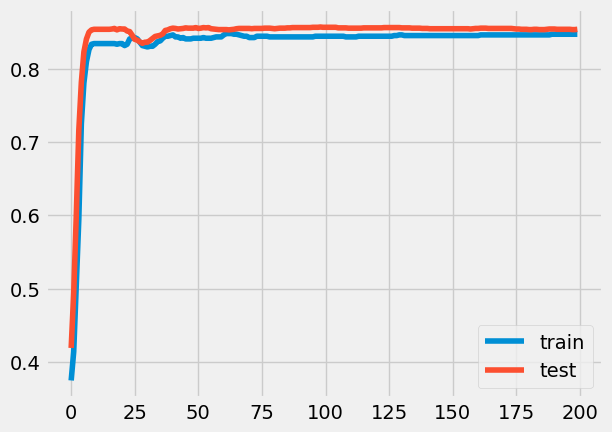

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=23, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(X_train_prep, y_train_prep, validation_data=(X_test_prep, y_test_prep),
                    epochs=200, verbose=0, batch_size=len(X_train_prep))
# evaluate the model
_, train_acc = model.evaluate(X_train_prep, y_train_prep, verbose=0)
_, test_acc = model.evaluate(X_test_prep, y_test_prep, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

- La gráfica muestra que el modelo de aprendizaje automático ha sido entrenado de manera exitosa. El modelo ha aprendido a reconocer patrones en los datos y es capaz de hacer predicciones precisas en nuevos datos.
- La diferencia entre la precisión en el conjunto de entrenamiento y el conjunto de prueba es relativamente pequeña. Esto indica que el modelo no está sobreajustando los datos de entrenamiento

Train: 0.892, Test: 0.834


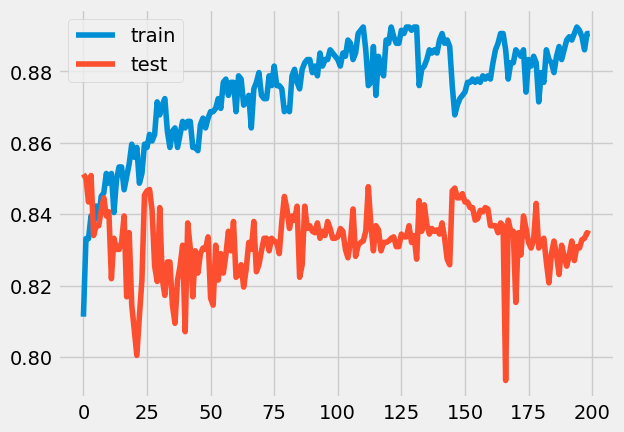

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=23, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(X_train_prep, y_train_prep, validation_data=(X_test_prep, y_test_prep),
                    epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(X_train_prep, y_train_prep, verbose=0)
_, test_acc = model.evaluate(X_test_prep, y_test_prep, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Conforme avanza el entrenamiento, la precisión en ambos conjuntos se estabiliza en un rango relativamente estrecho, pero con algunas fluctuaciones. Esto sugiere que el modelo ha encontrado un buen equilibrio entre ajustar los datos de entrenamiento y generalizar a nuevos datos, pero aún podría haber margen para mejora.

Train: 0.881, Test: 0.841


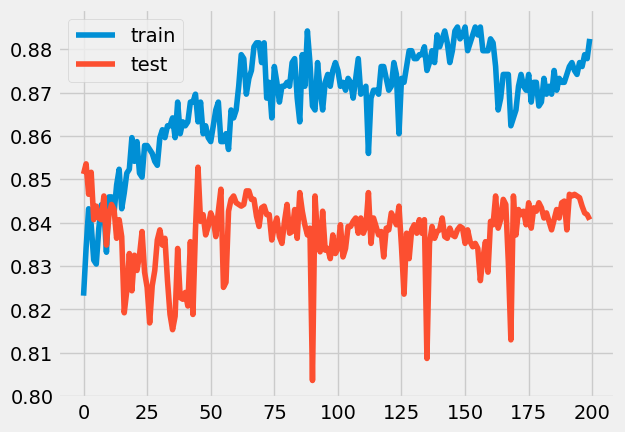

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=23, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(X_train_prep, y_train_prep, validation_data=(X_test_prep, y_test_prep),
                    epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(X_train_prep, y_train_prep, verbose=0)
_, test_acc = model.evaluate(X_test_prep, y_test_prep, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Notamos que, al principio del entrenamiento, tanto la precisión en el conjunto de entrenamiento como en el conjunto de prueba aumentan rápidamente y luego presentan fluctuaciones. Esto indica que el modelo está aprendiendo y ajustándose a los datos, pero también que puede haber cierta inestabilidad en el proceso de entrenamiento.

Train: 0.931, Test: 0.816


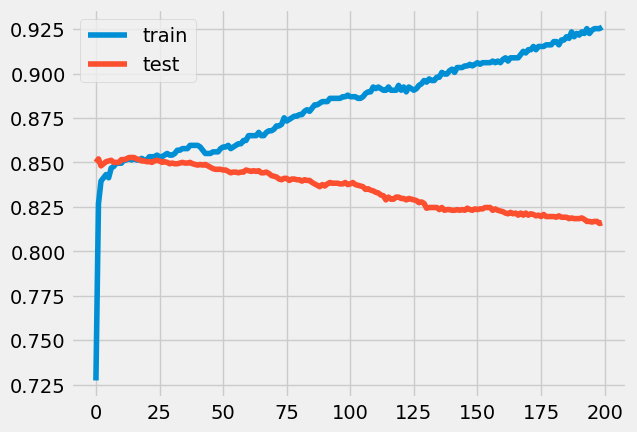

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=23, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(X_train_prep, y_train_prep, validation_data=(X_test_prep, y_test_prep),
                    epochs=200, verbose=0, batch_size=60)
# evaluate the model
_, train_acc = model.evaluate(X_train_prep, y_train_prep, verbose=0)
_, test_acc = model.evaluate(X_test_prep, y_test_prep, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

La precisión en el conjunto de prueba es significativamente menor que la precisión en el conjunto de entrenamiento. Esto indica un problema de sobreajuste. El modelo se ha ajustado demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos.

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
 # create model
 model = Sequential()
 model.add(Dense(10, input_shape=(23,), activation='relu', kernel_initializer='uniform'))
 model.add(Dense(15, activation='relu', kernel_initializer='uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
seed = 100
tf.random.set_seed(seed)

In [ ]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
model = KerasClassifier(model=create_model, epochs=20, batch_size=10, loss="binary_crossentropy",verbose=1)

In [ ]:
modelo = model.fit(X_train_prep, y_train)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8264 - loss: 0.6316
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.4220
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8368 - loss: 0.4067
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.4023
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8455 - loss: 0.4003
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8409 - loss: 0.3993
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3983
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.3977
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8443 - loss: 0.3973
Epoch 10/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - loss: 0.3969
Epoch 11/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8439 - loss: 0.3965
Epoch 12/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
print("Train Accuracy", np.mean(modelo.history_['accuracy']))
print("Train Loss", np.mean(modelo.history_['loss']))

Train Accuracy 0.8448495924472809
Train Loss 0.3914872020483017


- El modelo ha clasificado correctamente el 84.48% de las muestras de datos que utilizó para entrenar. Es decir, de cada 100 ejemplos que el modelo vio durante su aprendizaje, acertó en la clasificación de aproximadamente 84.
- Un valor de 0.3914 sugiere que el modelo está haciendo un trabajo razonable al ajustarse a los datos, aunque hay margen para mejorar.

257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[  40  335]
 [  49 2137]]


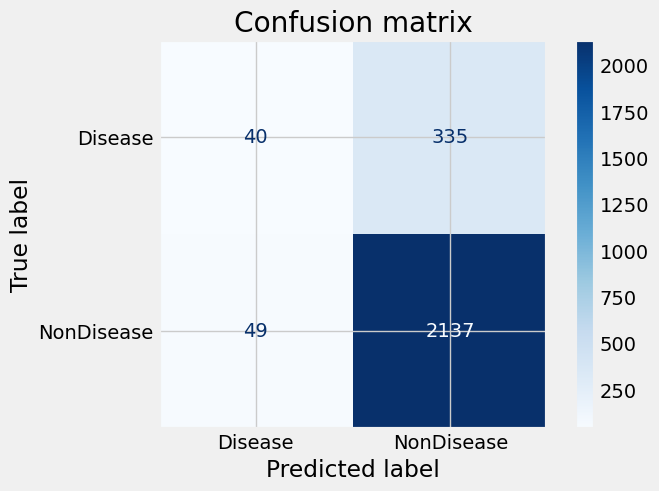

In [ ]:
# Plot non-normalized confusion matrix
titles_options = ("Confusion matrix")
disp = ConfusionMatrixDisplay.from_estimator(modelo, X_test_prep, y_test, cmap = plt.cm.Blues)
disp.ax_.set_title(titles_options)
print(disp.confusion_matrix)
plt.show()

- Verdaderos Positivos (VP): 40, El modelo predijo correctamente que 40 muestras tenían la enfermedad.
- Falsos Positivos (FP): 335, El modelo predijo erróneamente que 335 muestras tenían la enfermedad cuando en realidad no la tenían.
- Falsos Negativos (FN): 49, El modelo predijo erróneamente que 49 muestras no tenían la enfermedad cuando en realidad sí la tenían.
- Verdaderos Negativos (VN): 2137, El modelo predijo correctamente que 2137 muestras no tenían la enfermedad.

In [ ]:
y_pred = modelo.predict(X_test_prep)
accuracy = accuracy_score(y_test, y_pred)
Precision_Score = precision_score(y_test,y_pred, average='macro').round(4)
Recall_Score = recall_score(y_test,y_pred, average='macro').round(4)
F1_Score = f1_score(y_test,y_pred,average='macro').round(4)
dat = [['Accuracy ',accuracy ], ['Precision_Score ', Precision_Score ],
        ['Recall_Score', Recall_Score],['F1_Scoree', F1_Score] ]
df1 = pd.DataFrame(dat, columns=['Medida', 'valor'])
df1

257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Medida,valor
0,Accuracy,0.850059
1,Precision_Score,0.657000
2,Recall_Score,0.542100
3,F1_Scoree,0.545000


## **AJUSTE DE HIPERPARÁMETROS**

## **Cómo ajustar tamaño del lote y el número de épocas**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model1():
 # create model
 model = Sequential()
 model.add(Dense(12, input_shape=(23,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
seed = 100
tf.random.set_seed(seed)

In [ ]:
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
model1 = KerasClassifier(model=create_model1, verbose=0)

In [ ]:
# define the grid search parameters
param_grid1 = {
    'epochs': [10, 50, 100],
    'batch_size':[10, 20, 40, 60, 80, 100]
}
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid1, n_jobs=-1, cv=3,verbose=0, return_train_score=True)
grid_result1 = grid1.fit(X_train_prep, y_train)

In [ ]:
scores1 = pd.DataFrame(grid_result1.cv_results_)
scores1['Epochs_batch'] = '(' + scores1['param_epochs'].astype(str) + ' - ' + scores1['param_batch_size'].astype(str) + ')'

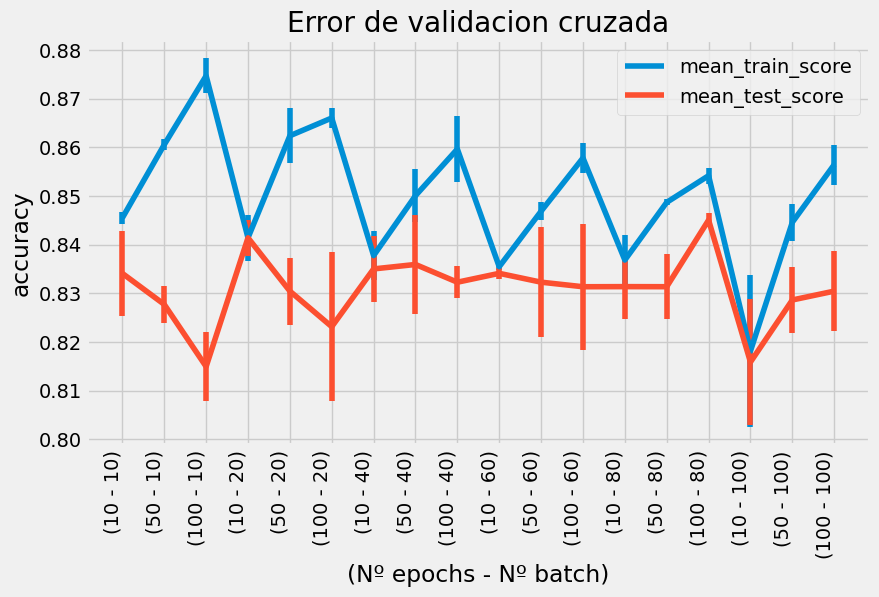

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
scores1.plot(x='Epochs_batch', y='mean_train_score', yerr='std_train_score', ax=ax)
scores1.plot(x='Epochs_batch', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xticks(np.arange(len(scores1['Epochs_batch'])))
ax.set_xticklabels(scores1['Epochs_batch'],rotation=90,ha='right')
ax.set_ylabel('accuracy')
ax.set_xlabel('(Nº epochs - Nº batch)')
ax.set_title('Error de validacion cruzada');

Elementos clave de la gráfica:

- Eje X: Representa las diferentes combinaciones de número de épocas y tamaño de lote. Cada punto en el eje X corresponde a una configuración diferente.
- Eje Y: Representa la precisión del modelo. Valores más altos indican un mejor rendimiento.

Esta gráfica nos presenta la evolución del error de un modelo de aprendizaje automático a lo largo de diferentes configuraciones de hiperparámetros. En este caso, se está variando el número de épocas y el tamaño del lote (batch size) durante el entrenamiento.



In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.845031 using {'batch_size': 80, 'epochs': 100}
0.834082 (0.008673) with: {'batch_size': 10, 'epochs': 10}
0.827714 (0.003759) with: {'batch_size': 10, 'epochs': 50}
0.814941 (0.007053) with: {'batch_size': 10, 'epochs': 100}
0.841390 (0.003666) with: {'batch_size': 20, 'epochs': 10}
0.830439 (0.006892) with: {'batch_size': 20, 'epochs': 50}
0.823140 (0.015354) with: {'batch_size': 20, 'epochs': 100}
0.835003 (0.006859) with: {'batch_size': 40, 'epochs': 10}
0.835918 (0.010186) with: {'batch_size': 40, 'epochs': 50}
0.832273 (0.003251) with: {'batch_size': 40, 'epochs': 100}
0.834094 (0.001076) with: {'batch_size': 60, 'epochs': 10}
0.832280 (0.011302) with: {'batch_size': 60, 'epochs': 50}
0.831342 (0.012917) with: {'batch_size': 60, 'epochs': 100}
0.831365 (0.006659) with: {'batch_size': 80, 'epochs': 10}
0.831350 (0.006669) with: {'batch_size': 80, 'epochs': 50}
0.845031 (0.001399) with: {'batch_size': 80, 'epochs': 100}
0.815872 (0.012930) with: {'batch_size': 100, 'epochs':

## **Cómo ajustar el algoritmo de optimización del entrenamiento**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model2(optimizer='adam'):
 # create model
 model = Sequential()
 model.add(Dense(12, input_shape=(23,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 return model
# fix random seed for reproducibility
seed = 100
tf.random.set_seed(seed)

In [ ]:
# create model
model2 = KerasClassifier(model=create_model2, loss="binary_crossentropy", epochs=100, batch_size=10, verbose=0)

In [ ]:
# define the grid search parameters
param_grid2 = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
}
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid2, n_jobs=-1, cv=3,
                     return_train_score = True)
grid_result2 = grid2.fit(X_train_prep, y_train)


In [ ]:
scores2 = pd.DataFrame(grid_result2.cv_results_)

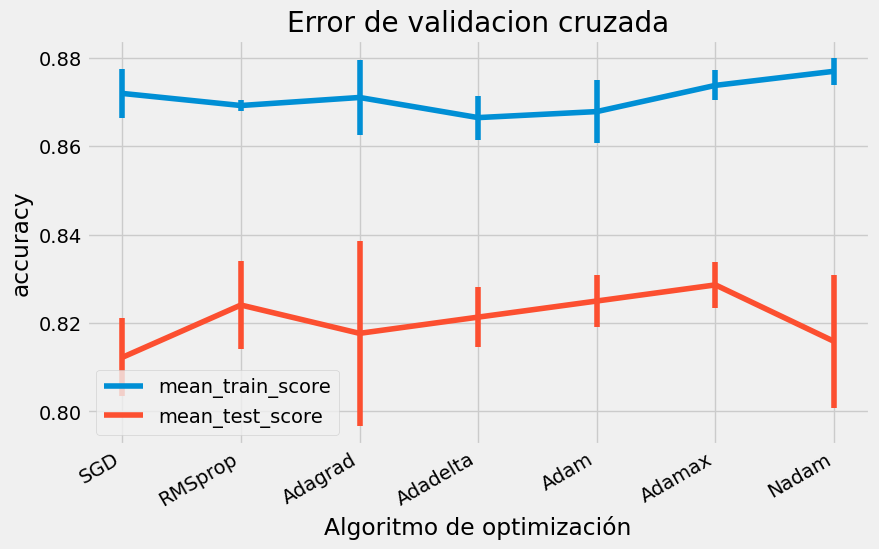

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
scores2.plot(x='param_optimizer', y='mean_train_score', yerr='std_train_score', ax=ax)
scores2.plot(x='param_optimizer', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xticks(np.arange(len(scores2['param_optimizer'])))
ax.set_xticklabels(scores2['param_optimizer'],rotation=30,ha='right')
ax.set_ylabel('accuracy')
ax.set_xlabel('Algoritmo de optimización')
ax.set_title('Error de validacion cruzada');


Esta gráfica compara el rendimiento de diferentes algoritmos de optimización en un modelo de aprendizaje automático. Cada punto en el gráfico representa el rendimiento promedio de un algoritmo en particular, y las barras de error indican la variabilidad de los resultados.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828620 using {'optimizer': 'Adamax'}
0.812224 (0.008837) with: {'optimizer': 'SGD'}
0.824066 (0.010048) with: {'optimizer': 'RMSprop'}
0.817659 (0.020990) with: {'optimizer': 'Adagrad'}
0.821329 (0.006863) with: {'optimizer': 'Adadelta'}
0.824974 (0.005981) with: {'optimizer': 'Adam'}
0.828620 (0.005269) with: {'optimizer': 'Adamax'}
0.815842 (0.015118) with: {'optimizer': 'Nadam'}


## **Cómo ajustar la tasa de aprendizaje y el impulso**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model3():
 # create model
 model = Sequential()
 model.add(Dense(12, input_shape=(23,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 return model
# fix random seed for reproducibility
seed = 100
tf.random.set_seed(seed)

In [ ]:
model3 = KerasClassifier(model=create_model3, loss="binary_crossentropy", optimizer="SGD", epochs=100, batch_size=10, verbose=0)

In [ ]:
param_grid3 = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'optimizer__momentum':[0.0, 0.2, 0.4, 0.8, 0.9]
}
grid3 = GridSearchCV(estimator=model3, param_grid=param_grid3, n_jobs=-1, cv=3,return_train_score = True)
grid_result3 = grid3.fit(X_train_prep, y_train)

In [ ]:
scores3 = pd.DataFrame(grid_result3.cv_results_)
scores3['learning_rate_momentum'] = '(' + scores3['param_optimizer__learning_rate'].astype(str) + ' - ' + scores3['param_optimizer__momentum'].astype(str) + ')'

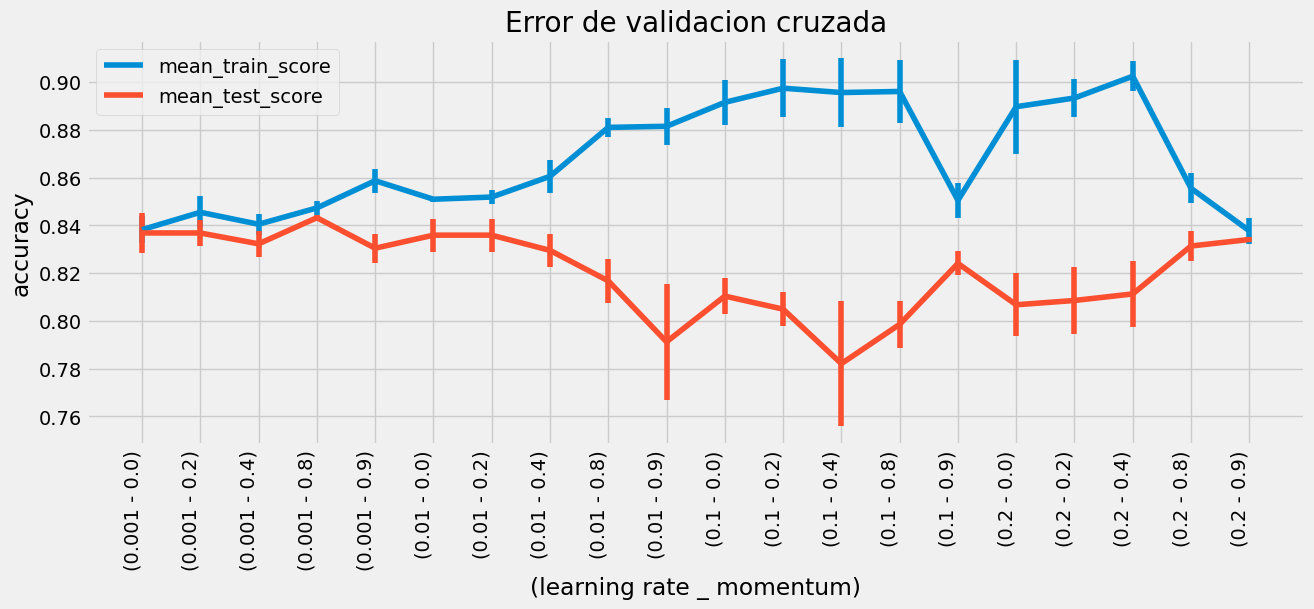

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
scores3.plot(x='learning_rate_momentum', y='mean_train_score', yerr='std_train_score', ax=ax)
scores3.plot(x='learning_rate_momentum', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xticks(np.arange(len(scores3['learning_rate_momentum'])))
ax.set_xticklabels(scores3['learning_rate_momentum'],rotation=90,ha='right')
ax.set_ylabel('accuracy')
ax.set_xlabel('(learning rate _ momentum)')
ax.set_title('Error de validacion cruzada');

En esta gráfica compara el rendimiento de un modelo de aprendizaje automático utilizando diferentes combinaciones de hiperparámetros: tasa de aprendizaje (learning rate) y momento (momentum). Cada punto en la gráfica representa el rendimiento promedio de una configuración específica de estos dos hiperparámetros, y las barras de error indican la variabilidad de los resultados.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.843209 using {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.8}
0.836832 (0.008370) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.0}
0.836824 (0.005263) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.2}
0.832275 (0.005448) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.4}
0.843209 (0.001200) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.8}
0.830439 (0.006128) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.9}
0.835908 (0.006886) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.0}
0.835908 (0.006886) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.2}
0.829528 (0.006990) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.4}
0.816763 (0.009141) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.8}
0.791229 (0.024245) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.9}
0.810383 (0.007426) 

## **Cómo ajustar la inicialización del peso de la red**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model4(init_mode='uniform'):
 # create model
 model = Sequential()
 model.add(Dense(12, input_shape=(23,), kernel_initializer=init_mode, activation='relu'))
 model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# fix random seed for reproducibility
seed = 100
tf.random.set_seed(seed)

In [ ]:
model4 = KerasClassifier(model=create_model4, epochs=100, batch_size=10, verbose=0)

In [ ]:
# define the grid search parameters
param_grid4 = {
    'model__init_mode': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
}
grid4 = GridSearchCV(estimator=model4, param_grid=param_grid4, n_jobs=-1, cv=3,return_train_score = True)
grid_result4 = grid4.fit(X_train_prep, y_train)

In [ ]:
scores4 = pd.DataFrame(grid_result4.cv_results_)

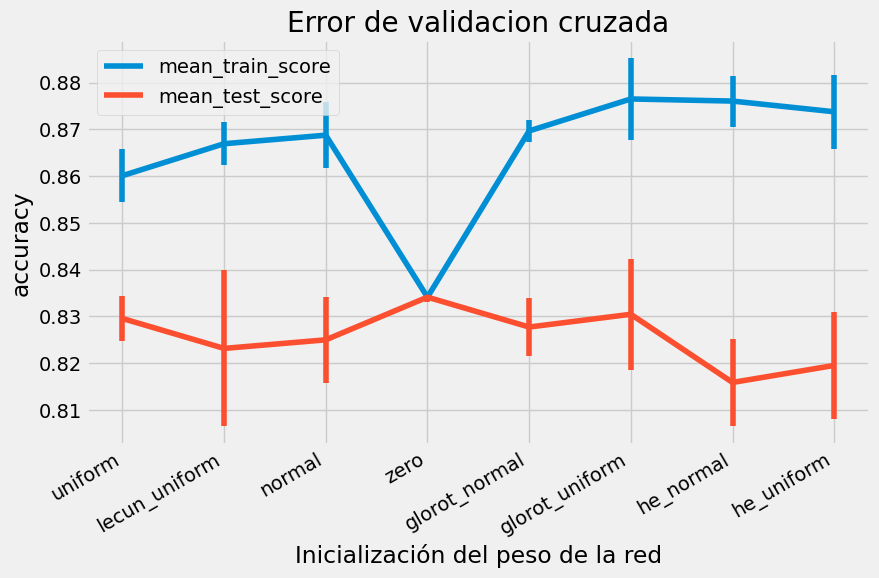

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
scores4.plot(x='param_model__init_mode', y='mean_train_score', yerr='std_train_score', ax=ax)
scores4.plot(x='param_model__init_mode', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xticks(np.arange(len(scores4['param_model__init_mode'])))
ax.set_xticklabels(scores4['param_model__init_mode'],rotation=30,ha='right')
ax.set_ylabel('accuracy')
ax.set_xlabel('Inicialización del peso de la red')
ax.set_title('Error de validacion cruzada');

Esta gráfica compara el rendimiento de un modelo de aprendizaje automático utilizando diferentes métodos de inicialización de pesos. Cada punto en la gráfica representa el rendimiento promedio de un método de inicialización en particular, y las barras de error indican la variabilidad de los resultados.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834094 using {'model__init_mode': 'zero'}
0.829533 (0.004710) with: {'model__init_mode': 'uniform'}
0.823133 (0.016696) with: {'model__init_mode': 'lecun_uniform'}
0.824967 (0.009132) with: {'model__init_mode': 'normal'}
0.834094 (0.001076) with: {'model__init_mode': 'zero'}
0.827704 (0.006131) with: {'model__init_mode': 'glorot_normal'}
0.830431 (0.011832) with: {'model__init_mode': 'glorot_uniform'}
0.815852 (0.009214) with: {'model__init_mode': 'he_normal'}
0.819495 (0.011372) with: {'model__init_mode': 'he_uniform'}


## **Cómo sintonizar la función de activación neuronal**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model5(activation='relu'):
 # create model
 model = Sequential()
 model.add(Dense(12, input_shape=(23,), kernel_initializer='uniform', activation=activation))
 model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# fix random seed for reproducibility
seed = 100
tf.random.set_seed(seed)

In [ ]:
# create model
#model5 = KerasClassifier(model=create_model5, epochs=100, batch_size=10, verbose=0)
model5 = KerasClassifier(model=create_model5, epochs=100, batch_size=10, verbose=0)


In [ ]:
# define the grid search parameters
# define the grid search parameters
param_grid5 = {
    'model__activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
}
grid5 = GridSearchCV(estimator=model5, param_grid=param_grid5, n_jobs=-1, cv=3,return_train_score = True)
grid_result5 = grid5.fit(X_train_prep, y_train)

In [ ]:
scores5 = pd.DataFrame(grid_result5.cv_results_)

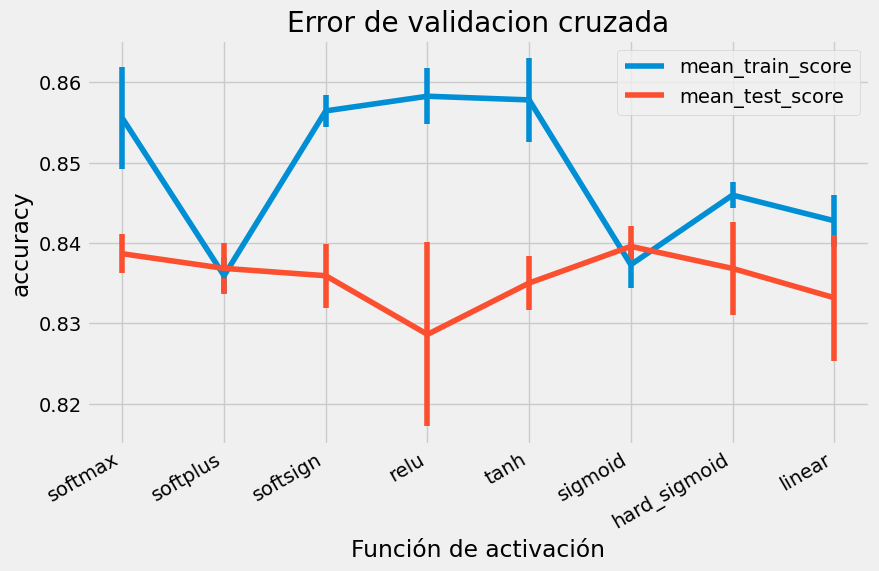

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
scores5.plot(x='param_model__activation', y='mean_train_score', yerr='std_train_score', ax=ax)
scores5.plot(x='param_model__activation', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xticks(np.arange(len(scores5['param_model__activation'])))
ax.set_xticklabels(scores5['param_model__activation'],rotation=30,ha='right')
ax.set_ylabel('accuracy')
ax.set_xlabel('Función de activación')
ax.set_title('Error de validacion cruzada');

Esta gráfica compara el rendimiento de un modelo de aprendizaje profundo al utilizar diferentes funciones de activación en su capa de salida. Cada punto en la gráfica representa el rendimiento promedio de una función de activación en particular, y las barras de error indican la variabilidad de los resultados.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.839564 using {'model__activation': 'sigmoid'}
0.838648 (0.002417) with: {'model__activation': 'softmax'}
0.836832 (0.003215) with: {'model__activation': 'softplus'}
0.835913 (0.003976) with: {'model__activation': 'softsign'}
0.828610 (0.011449) with: {'model__activation': 'relu'}
0.835005 (0.003374) with: {'model__activation': 'tanh'}
0.839564 (0.002480) with: {'model__activation': 'sigmoid'}
0.836822 (0.005791) with: {'model__activation': 'hard_sigmoid'}
0.833176 (0.007841) with: {'model__activation': 'linear'}


In [ ]:
y_pred_fin = grid_result5.predict(X_test_prep)

accuracy = accuracy_score(y_test, y_pred_fin)
Precision_Score = precision_score(y_test,y_pred_fin, average='macro').round(4)
Recall_Score = recall_score(y_test,y_pred_fin, average='macro').round(4)
F1_Score = f1_score(y_test,y_pred_fin,average='macro').round(4)

dat = [['Accuracy ',accuracy ], ['Precision_Score ', Precision_Score ],
        ['Recall_Score', Recall_Score],['F1_Scoree', F1_Score] ]

res_fin = pd.DataFrame(dat, columns=['Medida', 'valor'])
res_fin

,Medida,valor
0,Accuracy,0.855525
1,Precision_Score,0.752000
2,Recall_Score,0.513300
3,F1_Scoree,0.488900


## **Cómo ajustar la regularización del abandono**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model6(dropout_rate, weight_constraint):
 # create model
 model = Sequential()
 model.add(Dense(12, input_shape=(23,), kernel_initializer='uniform', activation='linear', kernel_constraint=MaxNorm(weight_constraint)))
 model.add(Dropout(dropout_rate))
 model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# fix random seed for reproducibility
seed = 100
tf.random.set_seed(seed)
# load dataset

In [ ]:
# create model
model6 = KerasClassifier(model=create_model6, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
param_grid6 = {
    'model__weight_constraint': [1.0, 2.0, 4.0, 5.0],
    'model__dropout_rate': [0.0, 0.1, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]
}
grid6 = GridSearchCV(estimator=model6, param_grid=param_grid6, n_jobs=-1, cv=3,return_train_score = True)
grid_result6 = grid6.fit(X_train_prep, y_train)

In [ ]:
scores6 = pd.DataFrame(grid_result6.cv_results_)
scores6['weight_constraint_dropout_rate'] = '(' + scores6['param_model__weight_constraint'].astype(str) + ' - ' + scores6['param_model__dropout_rate'].astype(str) + ')'

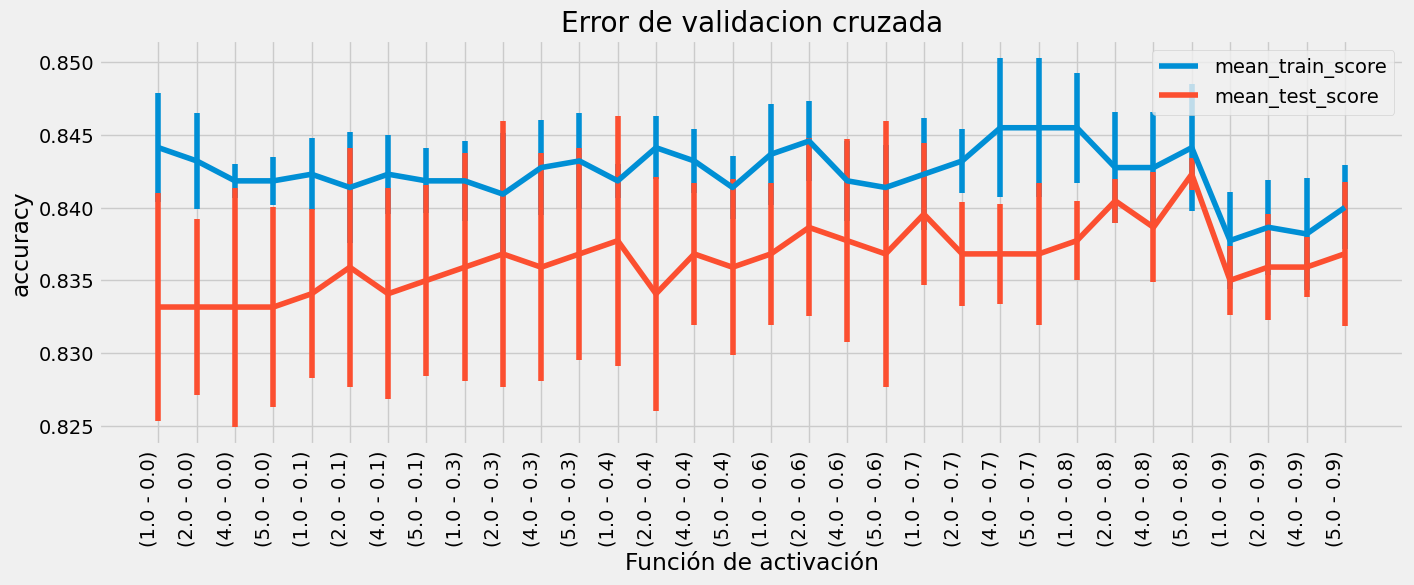

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
scores6.plot(x='weight_constraint_dropout_rate', y='mean_train_score', yerr='std_train_score', ax=ax)
scores6.plot(x='weight_constraint_dropout_rate', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xticks(np.arange(len(scores6['weight_constraint_dropout_rate'])))
ax.set_xticklabels(scores6['weight_constraint_dropout_rate'],rotation=90,ha='right')
ax.set_ylabel('accuracy')
ax.set_xlabel('Función de activación')
ax.set_title('Error de validacion cruzada');

En esta otra gráfica se compara el rendimiento de un modelo de aprendizaje profundo al utilizar diferentes combinaciones de hiperparámetros de la función de activación. Cada punto en la gráfica representa el rendimiento promedio de una configuración específica de estos hiperparámetros, y las barras de error indican la variabilidad de los resultados.



In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result6.best_score_, grid_result6.best_params_))
means = grid_result6.cv_results_['mean_test_score']
stds = grid_result6.cv_results_['std_test_score']
params = grid_result6.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842299 using {'model__dropout_rate': 0.8, 'model__weight_constraint': 5.0}
0.833176 (0.007841) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 1.0}
0.833176 (0.006050) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 2.0}
0.833174 (0.008208) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 4.0}
0.833174 (0.006889) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 5.0}
0.834087 (0.005794) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 1.0}
0.835908 (0.008205) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 2.0}
0.834089 (0.007253) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 4.0}
0.835000 (0.006552) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 5.0}
0.835911 (0.007840) with: {'model__dropout_rate': 0.3, 'model__weight_constraint': 1.0}
0.836822 (0.009127) with: {'model__dropout_rate': 0.3, 'model__weight_constraint': 2.0}
0.835911 (0.007840) with: {'model__dr

## **Cómo ajustar el número de neuronas en la capa oculta**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model7(neurons):
 # create model
 model = Sequential()
 model.add(Dense(neurons, input_shape=(23,), kernel_initializer='uniform', activation='linear', kernel_constraint=MaxNorm(4)))
 model.add(Dropout(0.2))
 model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# fix random seed for reproducibility
seed = 100
tf.random.set_seed(seed)

In [ ]:
# create model
model7 = KerasClassifier(model=create_model7, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
param_grid7 = {
    'model__neurons': [1, 5, 10, 15, 20, 25, 30]
}
grid7 = GridSearchCV(estimator=model7, param_grid=param_grid7, n_jobs=-1, cv=3,return_train_score = True)
grid_result7 = grid7.fit(X_train_prep, y_train)

In [ ]:
scores7 = pd.DataFrame(grid_result7.cv_results_)

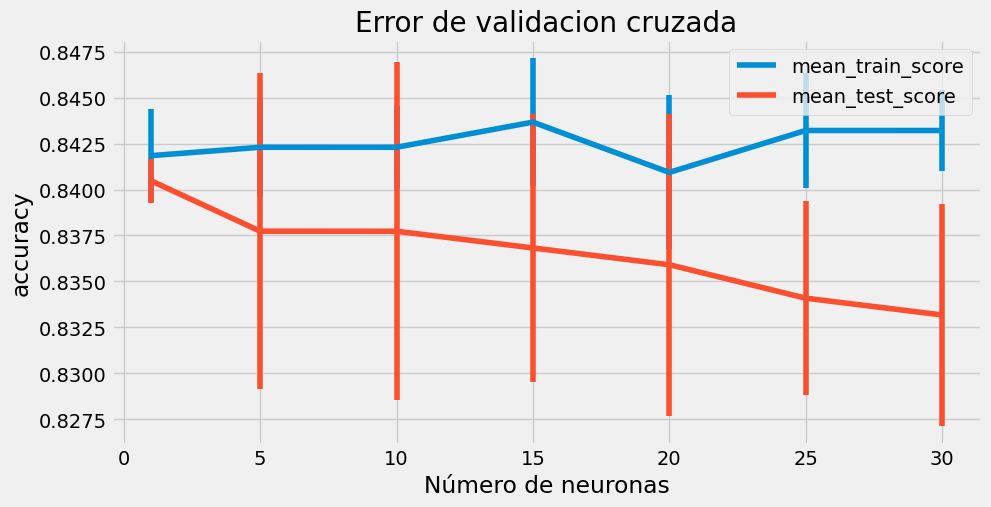

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
scores7.plot(x='param_model__neurons', y='mean_train_score', yerr='std_train_score', ax=ax)
scores7.plot(x='param_model__neurons', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('Número de neuronas')
ax.set_title('Error de validacion cruzada');

Esta gráfica compara el rendimiento de un modelo de aprendizaje profundo al variar el número de neuronas en una capa específica de la red neuronal. Cada punto en la gráfica representa el rendimiento promedio de una configuración con un número determinado de neuronas, y las barras de error indican la variabilidad de los resultados.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result7.best_score_, grid_result7.best_params_))
means = grid_result7.cv_results_['mean_test_score']
stds = grid_result7.cv_results_['std_test_score']
params = grid_result7.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.840475 using {'model__neurons': 1}
0.840475 (0.001199) with: {'model__neurons': 1}
0.837732 (0.008581) with: {'model__neurons': 5}
0.837730 (0.009192) with: {'model__neurons': 10}
0.836822 (0.007311) with: {'model__neurons': 15}
0.835908 (0.008205) with: {'model__neurons': 20}
0.834089 (0.005265) with: {'model__neurons': 25}
0.833176 (0.006050) with: {'model__neurons': 30}


## **Modelo Final**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model_fin(neurons, optimizer='adam',init_mode='uniform',activation='relu'):
 # create model
 model = Sequential()
 model.add(Dense(neurons, input_shape=(23,), kernel_initializer=init_mode, activation=activation))
 model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 return model

# fix random seed for reproducibility


In [ ]:
# Creación del modelo
seed = 100
tf.random.set_seed(seed)
model_fin = KerasClassifier(model=create_model_fin, verbose=0)

In [ ]:
# define the grid search parameters
param_grid_fin = {
    'model__neurons': [1, 5, 12, 15],
    'epochs': [50, 100],
    'batch_size': [10, 50, 100],
    'optimizer': ['Adam', 'Adadelta'],
    'model__activation': ['softmax',  'relu'],
    'model__init_mode': ['uniform', 'normal'],
}

grid_fin = GridSearchCV(estimator=model_fin, param_grid=param_grid_fin, n_jobs=-1, cv=3,return_train_score = True)
grid_result_fin = grid_fin.fit(X_train_prep, y_train)


In [ ]:
grid_result_fin.best_params_

{'batch_size': 100,
 'epochs': 50,
 'model__activation': 'relu',
 'model__init_mode': 'normal',
 'model__neurons': 5,
 'optimizer': 'Adam'}

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result_fin.best_score_, grid_result_fin.best_params_))
means = grid_result_fin.cv_results_['mean_test_score']
stds = grid_result_fin.cv_results_['std_test_score']
params = grid_result_fin.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844120 using {'batch_size': 100, 'epochs': 50, 'model__activation': 'relu', 'model__init_mode': 'normal', 'model__neurons': 5, 'optimizer': 'Adam'}
0.834094 (0.001076) with: {'batch_size': 10, 'epochs': 50, 'model__activation': 'softmax', 'model__init_mode': 'uniform', 'model__neurons': 1, 'optimizer': 'Adam'}
0.834094 (0.001076) with: {'batch_size': 10, 'epochs': 50, 'model__activation': 'softmax', 'model__init_mode': 'uniform', 'model__neurons': 1, 'optimizer': 'Adadelta'}
0.838658 (0.005708) with: {'batch_size': 10, 'epochs': 50, 'model__activation': 'softmax', 'model__init_mode': 'uniform', 'model__neurons': 5, 'optimizer': 'Adam'}
0.837747 (0.006242) with: {'batch_size': 10, 'epochs': 50, 'model__activation': 'softmax', 'model__init_mode': 'uniform', 'model__neurons': 5, 'optimizer': 'Adadelta'}
0.839561 (0.001404) with: {'batch_size': 10, 'epochs': 50, 'model__activation': 'softmax', 'model__init_mode': 'uniform', 'model__neurons': 12, 'optimizer': 'Adam'}
0.840480 (0.005

In [ ]:
modelo_final = grid_result_fin.best_estimator_

[[  34  341]
 [  29 2157]]


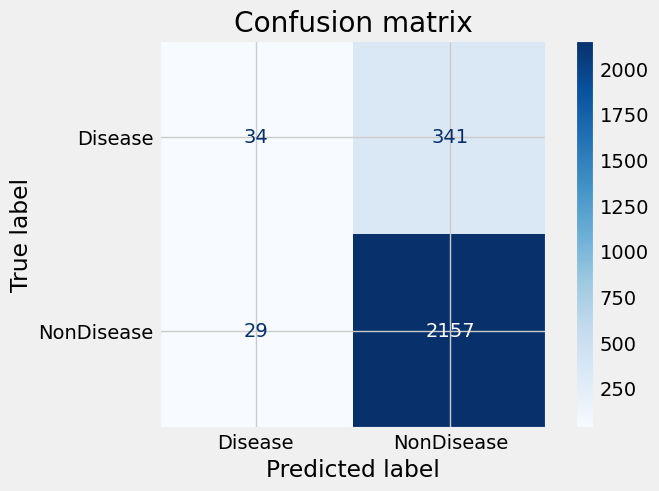

In [ ]:
# Plot non-normalized confusion matrix
titles_options = ("Confusion matrix")
disp = ConfusionMatrixDisplay.from_estimator(modelo_final, X_test_prep, y_test, cmap = plt.cm.Blues)
disp.ax_.set_title(titles_options)
print(disp.confusion_matrix)
plt.show()

La matriz de confusión proporciona una visión clara del desempeño de tu modelo de clasificación. Aunque el modelo muestra un buen rendimiento general, es importante considerar las implicaciones de los falsos positivos y falsos negativos en el contexto de la aplicación real. Al realizar ajustes y explorando diferentes opciones podemos mejorar nuestro modelo.

- Verdaderos Positivos (VP): 34. El modelo predijo correctamente que 34 pacientes estaban enfermos cuando en realidad lo estaban.
- Falsos Positivos (FP): 341. El modelo predijo erróneamente que 341 pacientes estaban enfermos cuando en realidad no lo estaban (falsos alarmas).
- Falsos Negativos (FN): 29. El modelo predijo erróneamente que 29 pacientes no estaban enfermos cuando en realidad sí lo estaban (falsos negativos).
- Verdaderos Negativos (VN): 2157. El modelo predijo correctamente que 2157 pacientes no estaban enfermos.



In [ ]:
y_pred_fin = modelo_final.predict(X_test_prep)

accuracy = accuracy_score(y_test, y_pred_fin)
Precision_Score = precision_score(y_test,y_pred_fin, average='macro').round(4)
Recall_Score = recall_score(y_test,y_pred_fin, average='macro').round(4)
F1_Score = f1_score(y_test,y_pred_fin,average='macro').round(4)

dat = [['Accuracy ',accuracy ], ['Precision_Score ', Precision_Score ],
        ['Recall_Score', Recall_Score],['F1_Scoree', F1_Score] ]

res_fin = pd.DataFrame(dat, columns=['Medida', 'valor'])
res_fin

,Medida,valor
0,Accuracy,0.855525
1,Precision_Score,0.701600
2,Recall_Score,0.538700
3,F1_Scoree,0.538100


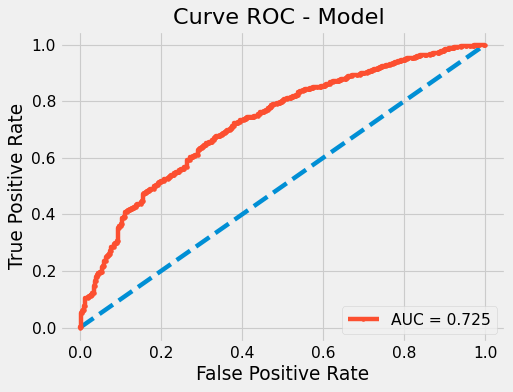

(<matplotlib.legend.Legend at 0x7e8d72b20f70>, None)

In [ ]:
lb = LabelEncoder()
plt.figure(dpi=80)
probs = modelo_final.predict_proba(X_test_prep)
auc = roc_auc_score(lb.fit_transform(y_test), probs[:, 1])
fpr, tpr,_ = roc_curve(lb.fit_transform(y_test), probs[:, 1])
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc:.3f}')
plt.title('Curve ROC - Model ')
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate')
plt.legend(loc="lower right"), plt.show()

INTERPRETACIÓN:

- Buen rendimiento: La curva ROC está por encima de la línea diagonal, lo que indica que el modelo está superando a un clasificador aleatorio.
- AUC de 0.725: Este valor sugiere un rendimiento moderadamente bueno. Un valor más cercano a 1 indicaría un modelo aún mejor.
- Equilibrio entre sensibilidad y especificidad: La forma de la curva sugiere un buen equilibrio entre la sensibilidad y la especificidad.

In [ ]:
## Result
input_df = pd.DataFrame({
    'male': ["Male"],
    'age': [50],
    'education': ["C"],
    'currentSmoker': ["No"],
    'cigsPerDay': [15],
    'BPMeds': [0],
    'prevalentStroke': [1],
    'prevalentHyp': [0],
    'diabetes': [1],
    'totChol': [150],
    'sysBP': [100],
    'diaBP': [76],
    'BMI': [35.2],
    'heartRate': [72],
    'glucose': [68]})
# Use pd.concat instead of .append()
X_input = pd.concat([X_train, input_df], ignore_index=True)
X_res = preprocessor.fit_transform(X_input)
X_res = pd.DataFrame(preprocessor.transform(X_input), columns=labels).tail(1)
prediccion = modelo_final.predict(X = X_res)
prediccion

array(['NonDisease'], dtype=object)

In [ ]:
import pickle

In [ ]:
data = {"model": modelo_final, "X_train": X_train, "preprocessor": preprocessor, "labels": labels}
with open('net_class_smoker.pkl', 'wb') as file:
    pickle.dump(data, file)